In [1]:
import scanpy as sc

In [2]:
import pandas as pd

In [3]:
import matplotlib; print(matplotlib.__version__)

3.8.1


In [4]:
import matplotlib.pyplot as plt

In [5]:
import numpy as np

In [16]:
import math

In [6]:
adata = sc.read_mtx('tmpoint1/run1/GSM6469858_Inj1_matrix.mtx').T

obs_data = pd.read_csv('tmpoint1/run1/GSM6469858_Inj1_barcodes.tsv', delimiter='\t', header=None)

adata.obs = obs_data

var_data = pd.read_csv('tmpoint1/run1/GSM6469858_Inj1_features.tsv', delimiter='\t', header=None, usecols=[0])

adata.var = var_data

adata

AnnData object with n_obs × n_vars = 8980 × 21880
    obs: 0
    var: 0

In [7]:
adata2 = sc.read_mtx('tmpoint1/run1/GSM6469858_Inj1_matrix.mtx').T

obs_data = pd.read_csv('tmpoint1/run1/GSM6469858_Inj1_barcodes.tsv', delimiter='\t', header=None)

adata2.obs = obs_data

var_data = pd.read_csv('tmpoint1/run1/GSM6469858_Inj1_features.tsv', delimiter='\t', header=None, usecols=[0])

adata2.var = var_data

adata2

AnnData object with n_obs × n_vars = 8980 × 21880
    obs: 0
    var: 0

In [10]:
adata.var

,0
0,ENSBTAG00000006648
1,ENSBTAG00000054829
2,ENSBTAG00000001753
3,ENSBTAG00000020035
4,ENSBTAG00000005540
...,...
21875,ENSBTAG00000053966
21876,ENSBTAG00000053117
21877,ENSBTAG00000049431
21878,ENSBTAG00000051489


# Doublet removal - optional but preferred

In [8]:
sc.pp.filter_genes(adata, min_cells = 10)

/storage/brno12-cerit/home/jiribruthans/miniconda3/envs/scvi-env/lib/python3.11/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/storage/brno12-cerit/home/jiribruthans/miniconda3/envs/scvi-env/lib/python3.11/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [9]:
sc.pp.filter_genes(adata2, min_cells = 10)

/storage/brno12-cerit/home/jiribruthans/miniconda3/envs/scvi-env/lib/python3.11/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/storage/brno12-cerit/home/jiribruthans/miniconda3/envs/scvi-env/lib/python3.11/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [10]:
sc.pp.highly_variable_genes(adata, n_top_genes = 2000, subset = True, flavor = 'seurat_v3')

In [11]:
sc.pp.highly_variable_genes(adata2, n_top_genes = 2000, subset = True, flavor = 'seurat_v3')

In [15]:
adata

AnnData object with n_obs × n_vars = 8980 × 2000
    obs: 0
    var: 0, 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg'

In [16]:
adata.X.sum(axis = 1)

matrix([[  244.],
        [11675.],
        [ 4832.],
        ...,
        [ 3265.],
        [  314.],
        [  343.]], dtype=float32)

In [60]:
adata.X

<8980x2000 sparse matrix of type '<class 'numpy.float32'>'
	with 1632806 stored elements in Compressed Sparse Column format>

In [12]:
sc.pp.normalize_total(adata, target_sum=1e4) #normalize every cell to 10,000 UMI

In [13]:
sc.pp.normalize_total(adata2, target_sum=1e4) #normalize every cell to 10,000 UMI

adata.X.sum(axis = 1)

In [19]:
sc.pp.log1p(adata2) #change to log counts

In [20]:
adata.X.sum(axis=0)


matrix([[20307.455  ,  1226.8956 ,  9409.444  , ...,  1933.1127 ,
          1445.354  ,   428.51962]], dtype=float32)

In [21]:
adata2.X.sum(axis = 0)

matrix([[2316.122   ,  227.51819 , 1652.93    , ...,   89.90266 ,
           96.871735,   49.93728 ]], dtype=float32)

In [75]:
h = np.array([])
h = np.append(h, 3)
h = np.append(h, 2)
h

array([3., 2.])

In [97]:
len(adata.X.toarray()

8980

In [104]:
np.array(adata.X.sum(axis=0)).ravel()

array([20307.455  ,  1226.8956 ,  9409.444  , ...,  1933.1127 ,
        1445.354  ,   428.51962], dtype=float32)

In [14]:
ar = np.array(adata.X.sum(axis=0)).ravel()
count = 0 
arr_new = np.array([])
for element in ar:
    arr_new = np.append(arr_new, ((element/8980)/np.std(adata.X.toarray()[count])))
    count = count + 1
arr_new

array([0.05672791, 0.00141594, 0.02819189, ..., 0.00798365, 0.00376208,
       0.00120412])

In [18]:
ar2 = np.array(adata2.X.sum(axis=0)).ravel()
count = 0 
arr2_new = np.array([])
for element in ar2:
    arr2_new = np.append(arr2_new, (math.log10((element/8980)+1)))
    count = count + 1
arr2_new

array([0.5134053 , 0.05561734, 0.31129227, ..., 0.0846723 , 0.06481447,
       0.02024496])

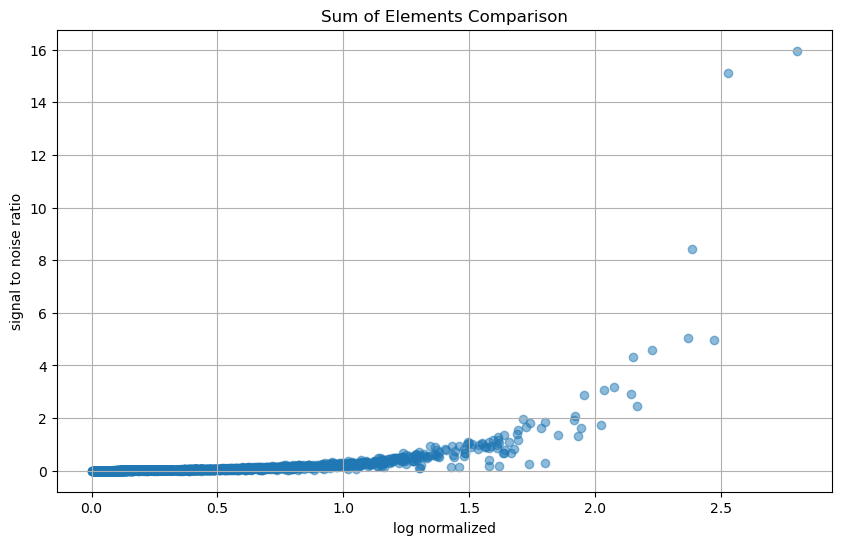

In [19]:

# Ensure conversion to 1D arrays
y_values = arr_new
x_values = arr2_new  # Converts and flattens y_values to 1D

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, alpha=0.5)
plt.title('Sum of Elements Comparison')
plt.xlabel('log normalized')
plt.ylabel('signal to noise ratio')
plt.grid(True)
plt.show()


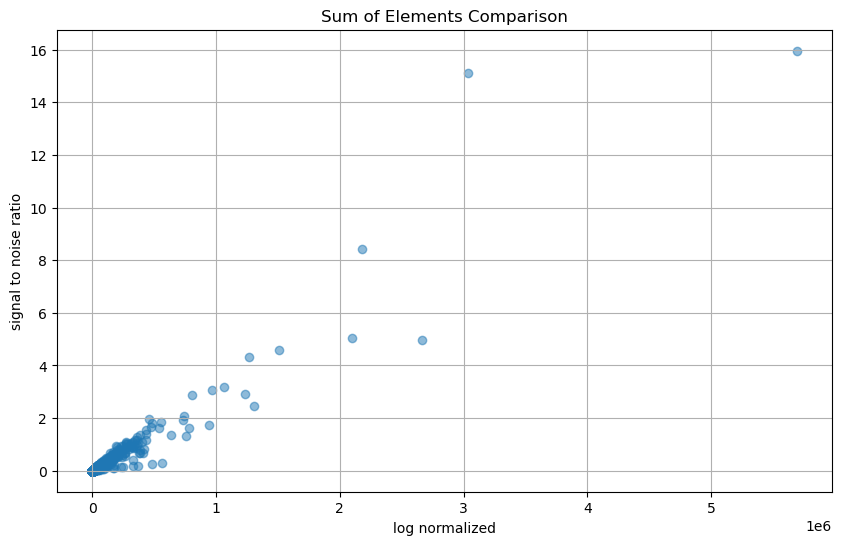

In [20]:
# Ensure conversion to 1D arrays
y_values = arr_new
x_values = np.array(adata.X.sum(axis=0)).ravel()  # Converts and flattens y_values to 1D

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, alpha=0.5)
plt.title('Sum of Elements Comparison')
plt.xlabel('log normalized')
plt.ylabel('signal to noise ratio')
plt.grid(True)
plt.show()


In [22]:
ar3 = np.array(adata2.X.sum(axis=0)).ravel()
count = 0 
arr3_new = np.array([])
for element in ar2:
    arr3_new = np.append(arr3_new, (math.sqrt((element/8980)) + math.sqrt((element/8980 + 1))))
    count = count + 1
arr3_new

array([3.3097355 , 1.43575499, 2.45465334, ..., 1.5663628 , 1.47866402,
       1.24202918])

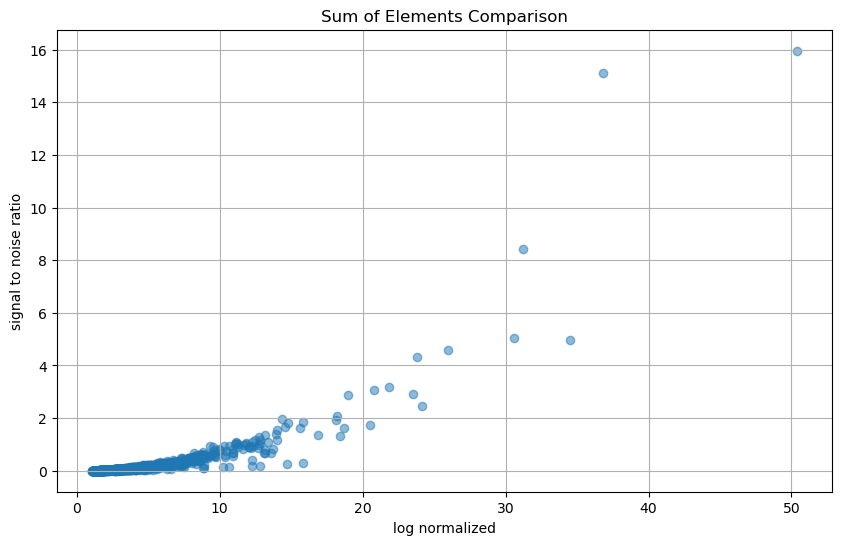

In [23]:
# Ensure conversion to 1D arrays
y_values = arr_new
x_values = arr3_new  # Converts and flattens y_values to 1D

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, alpha=0.5)
plt.title('Sum of Elements Comparison')
plt.xlabel('log normalized')
plt.ylabel('signal to noise ratio')
plt.grid(True)
plt.show()

In [27]:
adata.var

,0,n_cells,highly_variable,highly_variable_rank,means,variances,variances_norm
3,ENSBTAG00000020035,841,True,575.0,0.159243,0.646429,2.679297
35,ENSBTAG00000016619,96,True,1181.0,0.017038,0.036351,1.657768
40,ENSBTAG00000048631,706,True,1195.0,0.133853,0.323545,1.645803
67,ENSBTAG00000007444,152,True,448.0,0.033630,0.138305,3.179176
76,ENSBTAG00000000648,836,True,589.0,0.190423,0.787657,2.621246
...,...,...,...,...,...,...,...
21737,ENSBTAG00000049932,151,True,736.0,0.030178,0.088297,2.247253
21778,ENSBTAG00000023970,163,True,1482.0,0.022049,0.041835,1.446173
21850,ENSBTAG00000039037,24,True,251.0,0.011247,0.126057,4.617549
21856,ENSBTAG00000052012,27,True,281.0,0.009131,0.050925,4.293489


In [37]:
adata.raw = adata

# Clustering

In [38]:
sc.pp.highly_variable_genes(adata, n_top_genes = 2000)

In [39]:
adata.var

,0,n_cells,highly_variable,highly_variable_rank,means,variances,variances_norm,dispersions,dispersions_norm
3,ENSBTAG00000020035,841,True,575.0,1.181212,0.646429,2.679297,4.181664,0.324002
35,ENSBTAG00000016619,96,True,1181.0,0.126521,0.036351,1.657768,3.154229,-0.543867
40,ENSBTAG00000048631,706,True,1195.0,0.719802,0.323545,1.645803,3.558661,-0.519175
67,ENSBTAG00000007444,152,True,448.0,0.329516,0.138305,3.179176,3.723616,-0.059275
76,ENSBTAG00000000648,836,True,589.0,0.930552,0.787657,2.621246,3.575920,-0.490193
...,...,...,...,...,...,...,...,...,...
21737,ENSBTAG00000049932,151,True,736.0,0.148254,0.088297,2.247253,3.131994,-0.578773
21778,ENSBTAG00000023970,163,True,1482.0,0.252669,0.041835,1.446173,3.365989,-0.211438
21850,ENSBTAG00000039037,24,True,251.0,0.196737,0.126057,4.617549,5.312123,2.843681
21856,ENSBTAG00000052012,27,True,281.0,0.150628,0.050925,4.293489,4.592436,1.713888


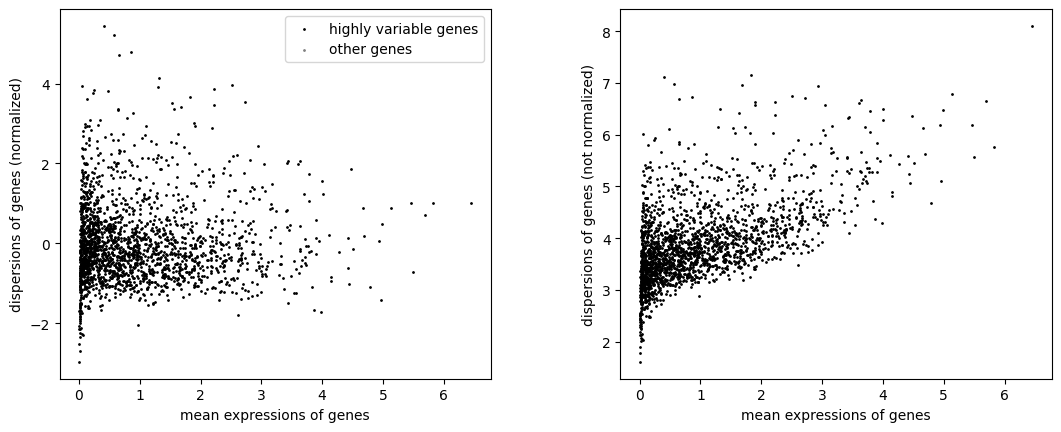

In [40]:
sc.pl.highly_variable_genes(adata)

In [41]:
adata = adata[:, adata.var.highly_variable]

In [42]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt', 'pct_counts_ribo'])

KeyError: "None of [Index(['total_counts', 'pct_counts_mt', 'pct_counts_ribo'], dtype='object')] are in the [columns]"

In [43]:
sc.pp.scale(adata, max_value=10)

In [44]:
sc.tl.pca(adata, svd_solver='arpack')

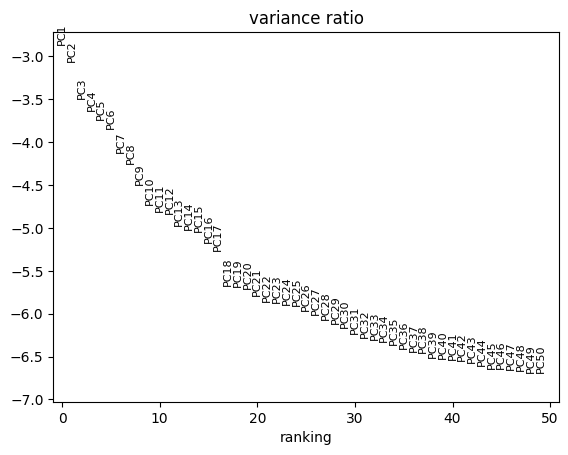

In [45]:
sc.pl.pca_variance_ratio(adata, log=True, n_pcs = 50)

In [54]:
sc.pp.neighbors(adata, n_pcs = 30)

In [65]:
#!pip install numpy --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 9.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 40.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 57.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.5/304.5 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 11.3 MB/s eta 0:00:0000:01
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.24.4
    Uninstalling protobuf-4.24.4:
      Successfully uninstalled protobuf-4.24.4
  You can safely remove it manually.
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempti

In [66]:
sc.tl.umap(adata)

/storage/brno2/home/jiribruthans/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


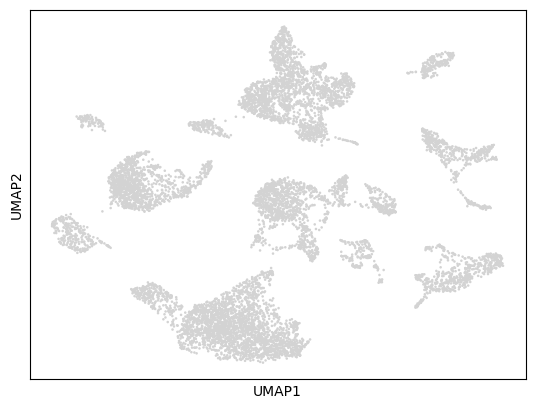

In [67]:
sc.pl.umap(adata)

In [ ]:
#!pip install leidenalg

In [ ]:
sc.tl.leiden(adata, resolution = 0.5)

In [ ]:
adata.obs

In [ ]:
sc.pl.umap(adata, color=['leiden'])

# Integration

In [ ]:
def pp(csv_path):
    adata = sc.read_csv(csv_path).T
    sc.pp.filter_genes(adata, min_cells = 10)
    sc.pp.highly_variable_genes(adata, n_top_genes = 2000, subset = True, flavor = 'seurat_v3')
    scvi.model.SCVI.setup_anndata(adata)
    vae = scvi.model.SCVI(adata)
    vae.train()
    solo = scvi.external.SOLO.from_scvi_model(vae)
    solo.train()
    df = solo.predict()
    df['prediction'] = solo.predict(soft = False)
    df.index = df.index.map(lambda x: x[:-2])
    df['dif'] = df.doublet - df.singlet
    doublets = df[(df.prediction == 'doublet') & (df.dif > 1)]

    adata = sc.read_csv(csv_path).T
    adata.obs['Sample'] = csv_path.split('_')[2] #'raw_counts/GSM5226574_C51ctr_raw_counts.csv'

    adata.obs['doublet'] = adata.obs.index.isin(doublets.index)
    adata = adata[~adata.obs.doublet]


    sc.pp.filter_cells(adata, min_genes=200) #get rid of cells with fewer than 200 genes
    #sc.pp.filter_genes(adata, min_cells=3) #get rid of genes that are found in fewer than 3 cells
    adata.var['mt'] = adata.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
    adata.var['ribo'] = adata.var_names.isin(ribo_genes[0].values)
    sc.pp.calculate_qc_metrics(adata, qc_vars=['mt', 'ribo'], percent_top=None, log1p=False, inplace=True)
    upper_lim = np.quantile(adata.obs.n_genes_by_counts.values, .98)
    adata = adata[adata.obs.n_genes_by_counts < upper_lim]
    adata = adata[adata.obs.pct_counts_mt < 20]
    adata = adata[adata.obs.pct_counts_ribo < 2]

    return adata

In [ ]:
import os

In [ ]:
out = []
for file in os.listdir('raw_counts/'):
    out.append(pp('raw_counts/' + file))

In [ ]:
adata = sc.concat(out)

In [ ]:
adata

In [ ]:
sc.pp.filter_genes(adata, min_cells = 10)

In [ ]:
adata.X

In [ ]:
from scipy.sparse import csr_matrix

In [ ]:
adata.X = csr_matrix(adata.X)

In [ ]:
adata.X

In [ ]:
adata.write_h5ad('combined.h5ad')

In [ ]:
########################################################

In [ ]:
import scanpy as sc
import scvi
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
adata = sc.read_h5ad('combined.h5ad')
adata

In [ ]:
adata.obs.groupby('Sample').count()

In [ ]:
sc.pp.filter_genes(adata, min_cells = 100)

In [ ]:
adata

In [ ]:
adata.layers['counts'] = adata.X.copy()

In [ ]:
sc.pp.normalize_total(adata, target_sum = 1e4)
sc.pp.log1p(adata)
adata.raw = adata

In [ ]:
adata.obs.head()

In [ ]:
adata

In [ ]:
# sc.pp.highly_variable_genes(adata, n_top_genes=3000, subset = True, layer = 'counts',
#                            flavor = "seurat_v3", batch_key="Sample") #no batch_key if one sample

In [ ]:
scvi.model.SCVI.setup_anndata(adata, layer = "counts",
                             categorical_covariate_keys=["Sample"],
                             continuous_covariate_keys=['pct_counts_mt', 'total_counts', 'pct_counts_ribo'])

In [ ]:
model = scvi.model.SCVI(adata)

In [ ]:
model.train() #may take a while without GPU

In [ ]:
adata.obsm['X_scVI'] = model.get_latent_representation()

In [ ]:
adata.layers['scvi_normalized'] = model.get_normalized_expression(library_size = 1e4)

In [ ]:
sc.pp.neighbors(adata, use_rep = 'X_scVI')

In [ ]:
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution = 0.5)

In [ ]:
sc.pl.umap(adata, color = ['leiden', 'Sample'], frameon = False)

In [ ]:
adata.write_h5ad('integrated.h5ad')

# Find markers/ label cell types

In [ ]:
sc.tl.leiden(adata, resolution = 1)

In [ ]:
sc.tl.rank_genes_groups(adata, 'leiden')

In [ ]:
#sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)

In [ ]:
markers = sc.get.rank_genes_groups_df(adata, None)
markers = markers[(markers.pvals_adj < 0.05) & (markers.logfoldchanges > .5)]
markers

In [ ]:
markers_scvi = model.differential_expression(groupby = 'leiden')
markers_scvi

In [ ]:
markers_scvi = markers_scvi[(markers_scvi['is_de_fdr_0.05']) & (markers_scvi.lfc_mean > .5)]
markers_scvi

In [ ]:
sc.pl.umap(adata, color = ['leiden'], frameon = False, legend_loc = "on data")

In [ ]:
sc.pl.umap(adata, color = ['EPCAM', 'MUC1'], frameon = False, layer = 'scvi_normalized', vmax = 5)
#, layer = 'scvi_normalized'

In [ ]:
cell_type = {"0":"Macrophage",
"1":"Fibroblast",
"2":"CD4+ T-cell",
"3":"AT2",
"4":"AT1",
"5":"CD8+ T-cell",
"6":"Endothelial cell",
"7":"Plasma cell",
"8":"Macrophage",
"9":"AT2",
"10":"Fibroblast",
"11":"Fibroblast",
"12":"Macrophage",
"13":"Macrophage",
"14":"Airway epithelial",
"15":"Airway epithelial",
"16":"Monocyte",
"17":"Airway epithelial",
"18":"B-cell",
"19":"Aerocyte",
"20":"Airway epithelial",
"21":"Smooth muscle cell",
"22":"Cycling T/NK",
"23":"Neuronal cell",
"24":"Denditic cell",
"25":"Pericyte",
"26":"Fibroblast",
"27":"Erythroid-like",
"28":"Macrophage"
}


In [ ]:
adata.obs['cell type'] = adata.obs.leiden.map(cell_type)

In [ ]:
sc.pl.umap(adata, color = ['cell type'], frameon = False)

In [ ]:
adata

In [ ]:
adata.uns['scvi_markers'] = markers_scvi
adata.uns['markers'] = markers

In [ ]:
adata.write_h5ad('integrated.h5ad')

In [ ]:
model.save('model.model')

# Analysis

In [ ]:
import scanpy as sc
import scvi
import seaborn as sns
import numpy as np
import pandas as pd

## Counting cells

In [ ]:
adata = sc.read_h5ad('integrated.h5ad')

In [ ]:
adata.obs.Sample.unique().tolist()

In [ ]:
def map_condition(x):
    if 'cov' in x:
        return 'COVID19'
    else:
        return 'control'

In [ ]:
adata.obs['condition'] = adata.obs.Sample.map(map_condition)
adata.obs

In [ ]:
num_tot_cells = adata.obs.groupby(['Sample']).count()
num_tot_cells = dict(zip(num_tot_cells.index, num_tot_cells.doublet))
num_tot_cells

In [ ]:
cell_type_counts = adata.obs.groupby(['Sample', 'condition', 'cell type']).count()
cell_type_counts = cell_type_counts[cell_type_counts.sum(axis = 1) > 0].reset_index()
cell_type_counts = cell_type_counts[cell_type_counts.columns[0:4]]
cell_type_counts

In [ ]:
cell_type_counts['total_cells'] = cell_type_counts.Sample.map(num_tot_cells).astype(int)

cell_type_counts['frequency'] = cell_type_counts.doublet / cell_type_counts.total_cells

cell_type_counts

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,4))

ax = sns.boxplot(data = cell_type_counts, x = 'cell type', y = 'frequency', hue = 'condition')

plt.xticks(rotation = 35, rotation_mode = 'anchor', ha = 'right')

plt.show()


## DE

In [ ]:
subset = adata[adata.obs['cell type'].isin(['AT1', 'AT2'])].copy()

In [ ]:
#two options: SCVI or diffxpy

In [ ]:
import diffxpy.api as de

In [ ]:
subset.X = subset.X.toarray()

In [ ]:
len(subset.var)

In [ ]:
subset

In [ ]:
sc.pp.filter_genes(subset, min_cells=100)

In [ ]:
len(subset.var)

In [ ]:
subset.obs = subset.obs.rename(columns = {'cell type':'cell_type'})

In [ ]:
#subset = subset.raw.to_adata() #need to run this if you scaled/regress your data and have negative numbers


In [ ]:
subset.obs

In [ ]:
#if want to test between covid/non covid
# res = de.test.wald(data=subset,
#              formula_loc= '~ 1 + condition',
#              factor_loc_totest='condition'
#                   )


res = de.test.wald(data=subset,
             formula_loc= '~ 1 + cell_type',
             factor_loc_totest='cell_type'
                  )

In [ ]:
dedf = res.summary().sort_values('log2fc', ascending = False).reset_index(drop = True)
dedf

In [ ]:
subset.obs.cell_type.unique()

In [ ]:
most_up = dedf.iloc[0].gene
i = np.where(subset.var_names == most_up)[0][0]

a = subset[subset.obs.cell_type == 'AT1'].X[:, i]
b = subset[subset.obs.cell_type == 'AT2'].X[:, i]
print(f"{most_up} expression:")
print(f"AT1: {a.mean()}")
print(f"AT2: {b.mean()}")


In [ ]:
dedf['log2fc'] = dedf['log2fc']*-1
dedf = dedf.sort_values('log2fc', ascending = False).reset_index(drop = True)
dedf

In [ ]:
dedf = dedf[(dedf.qval < 0.05) & (abs(dedf.log2fc) > .5)]
dedf

In [ ]:
dedf = dedf[dedf['mean'] > 0.15]
dedf

In [ ]:
genes_to_show = dedf[-25:].gene.tolist() + dedf[:25].gene.tolist() #top 25 and bottom 25 from sorted df

In [ ]:
sc.pl.heatmap(subset, genes_to_show, groupby='cell_type', swap_axes=True)

In [ ]:
#DE with scvi

In [ ]:
model  = scvi.model.SCVI.load('model.model', adata)

In [ ]:
model

In [ ]:
scvi_de = model.differential_expression(
    idx1 = [adata.obs['cell type'] == 'AT1'],
    idx2 = [adata.obs['cell type'] == 'AT2']
    )

#any set of cells vs any set of cells
# scvi_de = model.differential_expression(
#     idx1 = [(adata.obs['cell type'].isin(['AT1', 'AT2'])) & (adata.obs.condition == 'COVID19')],
#     idx2 = [(adata.obs['cell type'].isin(['AT1', 'AT2'])) & (adata.obs.condition == 'control')]
#     )

In [ ]:
scvi_de

In [ ]:
scvi_de = scvi_de[(scvi_de['is_de_fdr_0.05']) & (abs(scvi_de.lfc_mean) > .5)]
scvi_de = scvi_de.sort_values('lfc_mean')
scvi_de

In [ ]:
scvi_de = scvi_de[(scvi_de.raw_normalized_mean1 > .5) | (scvi_de.raw_normalized_mean2 > .5)]
scvi_de

In [ ]:
genes_to_show = scvi_de[-25:].index.tolist() + scvi_de[:25].index.tolist() #top 25 and bottom 25 from sorted df


In [ ]:

sc.pl.heatmap(subset, genes_to_show, groupby='cell_type', swap_axes=True, layer = 'scvi_normalized',
              log = True)

# GO enrichment

In [ ]:
import gseapy as gp #this method requires internet connection

In [ ]:
gp.get_library_name()
# 'GO_Biological_Process_2021',
#'KEGG_2021_Human',

In [ ]:
subset

In [ ]:
enr = gp.enrichr(gene_list= dedf[dedf.log2fc > 0].gene.tolist(),
                 gene_sets=['KEGG_2021_Human','GO_Biological_Process_2021'],
                 organism='human', # don't forget to set organism to the one you desired!
                 outdir=None, # don't write to disk,
                 background = subset.var_names.tolist()
                )

In [ ]:
enr.results

## comparisons

In [ ]:
sc.pl.violin(subset[subset.obs.cell_type == 'AT2'], 'ETV5', groupby='condition')

In [ ]:
from scipy import stats

In [ ]:
temp = subset[subset.obs.cell_type == 'AT2']

i = np.where(temp.var_names == 'ETV5')[0][0]

In [ ]:
a = temp[temp.obs.condition == 'COVID19'].X[:,i]
b = temp[temp.obs.condition == 'control'].X[:,i]

In [ ]:
stats.mannwhitneyu(a, b)

## Score gene signature

In [ ]:
#gene signature, ie, input list of genes from user
with open('datp_sig.txt') as f:
    datp_sig = [x.strip() for x in list(f)]


In [ ]:
sc.tl.score_genes(subset, datp_sig, score_name = 'datp')

In [ ]:
subset.obs

In [ ]:
sc.pl.violin(subset, 'datp', groupby='condition')

In [ ]:
a = subset[subset.obs.condition == 'COVID19'].obs.datp.values
b = subset[subset.obs.condition == 'control'].obs.datp.values
stats.mannwhitneyu(a, b)

In [ ]:
sc.pl.umap(subset, color = 'datp', vmax = 1)

In [ ]:
#for thumbnail

In [ ]:
from matplotlib.pyplot import rc_context


In [ ]:
adata

In [ ]:
with rc_context({'figure.figsize': (8,8)}):
    sc.pl.umap(adata, color = ['cell type'], frameon = False, s = 5, legend_loc = 'on data',
              legend_fontsize=12, legend_fontoutline=2)

In [ ]:
with rc_context({'figure.figsize': (8,8)}):
    sc.pl.umap(adata, color = ['MUC1'], frameon = False, layer = 'scvi_normalized', vmax = 5, s = 5)